In [1]:
#Basic labraries
import pandas as pd
import numpy as np
#visuaization 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
movies = pd.read_csv(r"C:\Users\johnc\Desktop\Movie Recommendation\movies.csv")
ratings = pd.read_csv(r"C:\Users\johnc\Desktop\Movie Recommendation\ratings.csv")


In [4]:
print(movies)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

In [5]:
print(ratings)

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]


In [6]:
print(movies.head(10))

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Adventure|Children  
8       

In [7]:
print(ratings.head(10))

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
5       1       70     3.0  964982400
6       1      101     5.0  964980868
7       1      110     4.0  964982176
8       1      151     5.0  964984041
9       1      157     5.0  964984100


In [8]:
#Merge the data
df = ratings.merge(movies, on='movieId')

In [9]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [10]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [14]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [15]:
print("Total user :", df['userId'].nunique())
print("Total movies :", df['movieId'].nunique())

Total user : 610
Total movies : 9724


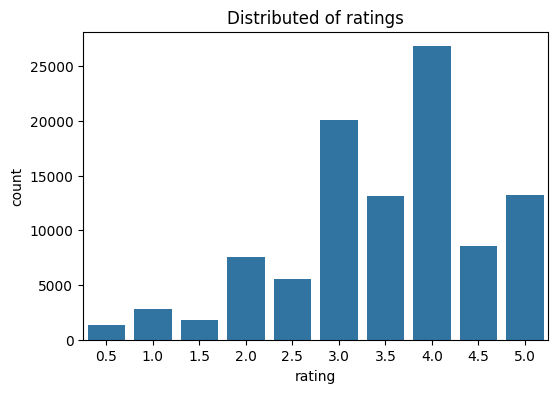

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x= 'rating', data=df)
plt.title("Distributed of ratings")
plt.show()

In [17]:
top_movie = df['title'].value_counts().head(10)
print(top_movie)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64


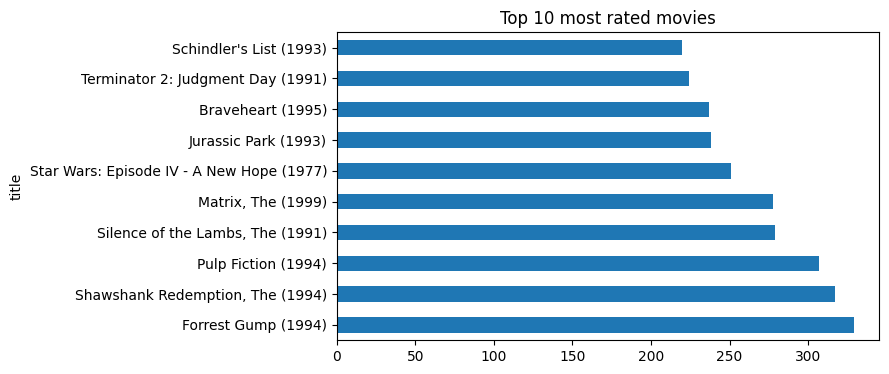

In [18]:
top_movie.plot(kind='barh', figsize=(7,4), title= "Top 10 most rated movies")
plt.show()

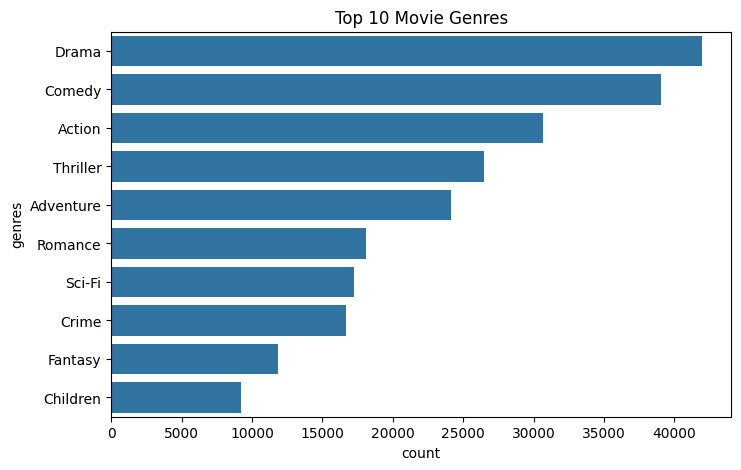

In [19]:
# Split the 'genres' column where multiple genres are separated by '|'
df['genres'] = df['genres'].str.split('|')

# Explode the list of genres into separate rows
df_exploded = df.explode('genres').reset_index(drop=True)

# Plot the top 10 movie genres
plt.figure(figsize=(8,5))
sns.countplot(y='genres', data=df_exploded, order=df_exploded['genres'].value_counts().index[:10])
plt.title("Top 10 Movie Genres")
plt.show()

In [21]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\johnc\Desktop\EV Demand Pred\ev_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [23]:
# Combine movie title and genres into one feature for simplicity
df['genres'] = df['genres'].fillna('').astype(str)
df['combined_features'] = df['title'] + " " + df['genres']
df['combined_features'].head()

0    Toy Story (1995) ['Adventure', 'Animation', 'C...
1        Grumpier Old Men (1995) ['Comedy', 'Romance']
2          Heat (1995) ['Action', 'Crime', 'Thriller']
3    Seven (a.k.a. Se7en) (1995) ['Mystery', 'Thril...
4    Usual Suspects, The (1995) ['Crime', 'Mystery'...
Name: combined_features, dtype: object

In [24]:
movies = df.copy()

In [27]:
movies = movies.drop_duplicates(subset ="title", keep= 'first').reset_index(drop=True)

In [32]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['combined_features'])

In [33]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()


In [38]:
def get_recommendations(title):
    if title not in indices:
        return "Movie not found in dataset!"
    
    idx = indices[title]
    sim_scores = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()
    sim_scores_indices = sim_scores.argsort()[::-1]  # descending order
    sim_scores_indices = sim_scores_indices[sim_scores_indices != idx]
    top_indices = sim_scores_indices[:10]

    
    return movies['title'].iloc[top_indices]

In [39]:
get_recommendations('Toy Story (1995)')

735                        Toy Story 2 (1999)
1133                       Toy Story 3 (2010)
2692                          Toy, The (1982)
1714    We're Back! A Dinosaur's Story (1993)
497                       Now and Then (1995)
850                       Toy Soldiers (1991)
140             NeverEnding Story, The (1984)
7203                         Wild, The (2006)
481                            Jumanji (1995)
488                              Balto (1995)
Name: title, dtype: object